<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./423_Sentinel-3_SLSTR_NRT_AOD_exercise.ipynb"><< 423 - Exercise - Sentinel-3 SLSTR NRT - AOD</a>

<div class="alert alert-block alert-danger">
<b>40 - EXERCISES</b>
</div>

<div class="alert alert-block alert-danger">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** module is a prerequisite:

- [261 - CAMS EAC4 - Global reanalysis - Load and browse](../20_data_discovery/261_CAMS_eac4_load_browse.ipynb)    
    
It is recommended to go through the module before you do this exercise workbook.
</div>

<hr>

# 4.3.1 Copernicus Atmosphere Monitoring Service (CAMS) - Global reanalysis (EAC4)

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses (EAC4)`, `fire emissions` and `greenhouse gas flux inversions`.

This notebook is an `exercise workbook`, where you can practise the data handling with CAMS Global reanalysis (EAC4)  data.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

### Outline:
* [1 - Load and browse EAC4 reanalysis data](#load_browse)
* [2 - Bring longitude coordinates onto a [-180,180] grid](#shift)
* [3 - Retrieve the data variable total_colomn_carbon_monoxide as xarray.DataArray](#retrieve)
* [4 - Visualize total column carbon monoxide reanalysis data](#visualize)

<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='load_browse'></a>Load and browse `EAC4 reanalysis` data

CAMS global reanalysis data is available either in `GRIB` or `netCDF`. The data for this example is available in `netCDF`. You can use xarray's function `xr.open_dataset()` to open the netCDF file as a xarray.Dataset.

In [3]:
file = xr.open_dataset('../eodata/cams/eac4/20191225-31_cams_eac4.nc')
file


<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 56)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2019-12-25 ... 2019-12-31T21:00:00
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
    aod550     (time, latitude, longitude) float32 ...
    tcco       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-25 08:11:01 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Let us inspect the three dimensions (`latitude`, `longitude` and `time`) of the loaded file: 
- What data variables does it contain and what `long_name` do they have?
</div>

You can retrieve the `long_name` of a data variable as follows: `file.omaod550.long_name` retrieves the long name of the `omaod550` variable.

The file contains three data variables:
* `omaod550`: Organic Matter Aerosol Optical Depth at 550nm
* `aod550`: Total Aerosol Optical Depth at 550nm
* `tcco`: Total column Carbon monoxide



<br>

### <a id='shift'></a>Bring longitude coordinates onto a [-180,180] grid

You can assign new values to coordinates in an xarray.Dataset. You can do so with the `assign_coords()` function from the xarray library, which you can apply onto an xarray.Dataset.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which re-assigns the longitude values from a [0,360] grid to a [-180,180] degrees grid.<br>
Inspect the newly assigned `longitude` coordinates afterwards and sort the longitude values in an ascending order.
<br>


**HINT:** <br>
You can use xarray's function `assign_coords()` for this operation.
</div>

In [4]:
# Enter your solution here






In [5]:
file_assigned = file.assign_coords(longitude=(((file.longitude + 180) % 360) - 180)).sortby('longitude')
file_assigned.longitude

<xarray.DataArray 'longitude' (longitude: 480)>
array([-180.  , -179.25, -178.5 , ...,  177.75,  178.5 ,  179.25],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2

<br>

### <a id='data_retrieve'></a>Retrieve the data variable `total column carbon monoxide` as xarray.DataArray

Let us store the data variable `total column carbon monoxide` as xarray.DataArray with the name `tcco`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that retrieves the data variable `tcco` (Total Column Carbon Monoxide). Call the resulting DataArray `tcco`.<br>
<br>


In [6]:
# Enter your solution here






In [7]:
tcco = file_assigned.tcco
tcco

<xarray.DataArray 'tcco' (time: 56, latitude: 241, longitude: 480)>
[6478080 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2019-12-25 ... 2019-12-31T21:00:00
Attributes:
    units:      kg m**-2
    long_name:  Total column Carbon monoxide

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Can you identify the unit of the `tcco` variable?
</div>

The unit of the `total column carbon monoxide` variable is `kg m**-2`.

<br>

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Retrieve `long_name`, `units`, `latitude` and `longitude` information from the `tcco` xarray.DataArray and store them as individual variables.<br>
<br>


In [8]:
# Enter your solution here





In [9]:
long_name = tcco.long_name
units = tcco.units

latitude = tcco.latitude
longitude = tcco.longitude

<br>

### <a id='visualize'></a>Visualize `total column carbon monoxide`

Let us visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that visualizes the `total column carbon monoxide` xarray.DataArray and make use of the following:

* the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh),
* the assigned variables `latitude` and `longitude`, and
* the retrieved attributes `units` and `long_name`.
<br>
    
Visualize different time steps to see the change of total column carbon monoxide during the Australian fires in December 2019.

<b>HINT:</b><br> With `?visualize_pcolormesh`, you can see what keyword arguments the function requires.<br>
With xarray's function `.max()`, you can see the maximum values of the DataArray in order to adjust `vmax` limits.
</div>

In [10]:
?visualize_pcolormesh

In [11]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Total column Carbon monoxide 2019-12-31T06:00:00.000000000'}>)

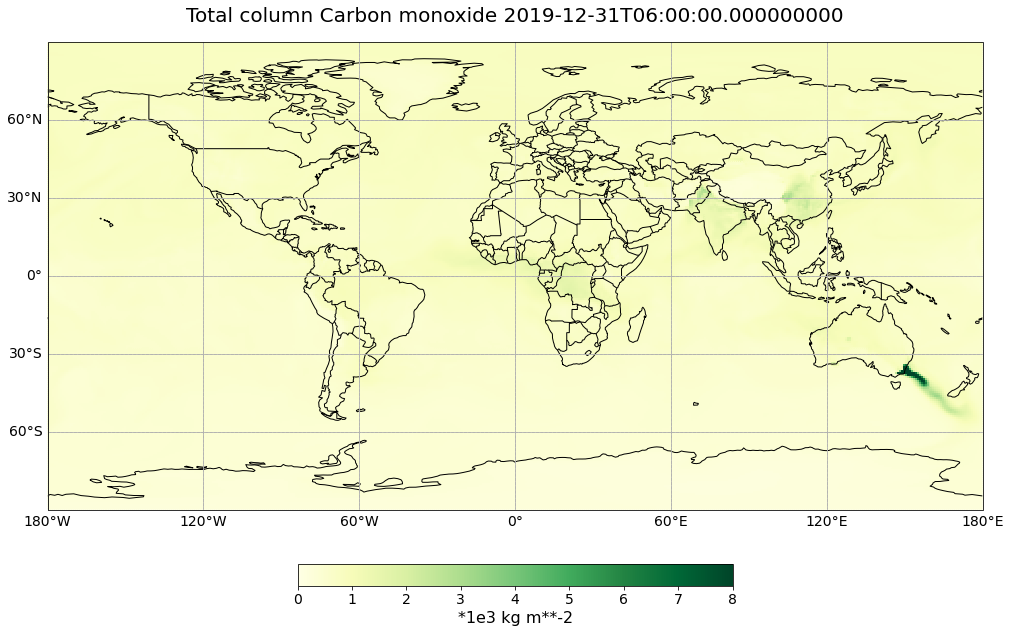

In [12]:
time_step=50
visualize_pcolormesh(data_array=tcco[time_step,:,:]*1e3,
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit='*1e3 ' + units,
                     long_name=long_name + ' ' + str(tcco[time_step,:,:].time.data),
                     vmin=0, 
                     vmax=8)

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What factor is suitable to multiply the `tcco` values with in order to bring the data onto a scale between 0 and 8?
</div>

Multiplying the data by a factor of 1000 brings the data values onto a more readable data scale.

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./423_Sentinel-3_SLSTR_NRT_AOD_exercise.ipynb"><< 423 - Exercise - Sentinel-3 SLSTR NRT - AOD</a>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>